In [ ]:
# Nate Brunacini, nbrunaci@u.rochester.edu
# Supervisor: Kelly A. Douglass
# This file runs the findMetallicities_Pilyugin function from findmetallicities_Pilyugin over all galaxies in the MaNGA 
# dataset and writes the results to a FITS file.

In [1]:
from findmetallicities_Pilyugin import *
import time
from astropy.table import Table
import os

/home/nbrunaci/.local/lib/python3.9/site-packages/marvin/core/exceptions.py:50: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  warnings.warn('cannot initiate Sentry error reporting: {0}.'.format(str(ee)),
[INFO]: No release version set. Setting default to DR15
[WARNING]: path /home/nbrunaci/sas/mangawork/manga/spectro/redux/v2_4_3/drpall-v2_4_3.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /home/nbrunaci/sas/mangawork/manga/spectro/analysis/v2_4_3/2.2.1/dapall-v2_4_3-2.2.1.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [2]:
# Calling the functions

# Obtaining redshift data from drpall fits file
with fits.open('drpall-v2_4_3.fits', memmap=True) as drpall:
    data = drpall[1].data
    
    exceptions = 0# Number of galaxies for which data could not be retrieved
    start = time.time()
    for index in range(8549,len(data['plateifu'])):# Use this to iterate over every galaxy
#     for index in range(0,1):
        try:#for i in range(0,1):#
            # Calculating metallicities
            plateifu = data['plateifu'][index]
            objmaps = addDiagnostics_Pilyugin(plateifu)
            results = findMetallicities_Pilyugin(objmaps)
            
            # Preparing layers of data values
            header = fits.PrimaryHDU([])
            R_hdu = fits.ImageHDU(results['R']['metallicity'].data, name='R_metallicity')
            R_ivar_hdu = fits.ImageHDU([])#fits.ImageHDU(results['R']['ivar'].data, name='R_ivar')# Left blank as ivar methods are not yet implemented
            
            # Preparing layers of mask values; ImageHDU apparently cannot be used for boolean values, so mask values are 
            # converted to integers here
            R_m_hdu = fits.ImageHDU(results['R']['metallicity'].mask.astype('int32'), name='R_mask')
            
            # Saving data and mask layers to FITS file
            hdul = fits.HDUList([header, R_hdu, R_ivar_hdu, R_m_hdu])
            filename = 'MetallicityFITS_Pilyugin/Pilyugin_'+plateifu+'.fits'
            # Removing existing file to allow new one to be saved
            if os.path.exists(filename):
                os.remove(filename)
            hdul.writeto(filename)
            
#             # Saving metallicity maps (Not really necessary, as maps can be created from the data in the FITS files)
#             plt.imshow(results['R']['metallicity'])
#             plt.colorbar()
#             plt.savefig('R_metallicity_maps/' + plateifu + '_Rmetallicity.png')
#             plt.close()
            
        except Exception:
            exceptions += 1
            print(index)
    end = time.time()
    print('Number of galaxies for which data could not be retrieved: ' + str(exceptions))
    print('Elapsed time: ' + str(end - start))

8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8564
8566
8567
8568
8571
8572
8574
8575
8578
8579
8582
8584
8586
8589
8592
8595
8596
8599
8600
8602
8603
8606
8609
8612
8613
8614
8615
8616
8617
8619
8620
8622
8624
8625
8627
8628
8629
8633
8634
8636
8637
8641
8642
8645
8647
8648
8651
8652
8653
8654
8656
8659
8660
8663
8666
8670
8671
8672
8673
8674
8675
8676
8677
8678
8680
8681
8684
8686
8687
8688
8689
8693
8695
8696
8698
8700
8701
8703
8704
8707
8708
8710
8711
8714
8715
8716
8717
8719
8721
8722
8725
8727
8728
8731
8733
8737
8739
8742
8747
8750
8751
8752
8755
8757
8759
8760
8761
8762
8765
8766
8767
8769
8771
8774
8775
8778
8779
8783
8784
8785
8787
8788
8789
8791
8793
8794
8795
8796
8797
8800
8802
8804
8807
8811
8814
8815
8816
8820
8821
8823
8824
8825
8828
8829
8830
8832
8833
8834
8837
8839
8840
8841
8842
8844
8846
8847
8849
8850
8852
8854
8855
8857
8858
8861
8862
8863
8864
8866
8867
8873
8874
8876
8877
8881
8883
8885
8888
8889
8891
8893
8894
8895
8896
8897
8898
8900
8902


11134
11136
11141
11142
11143
11144
11146
11147
11150
11151
11152
11153
11154
11156
11157
11158
11159
11160
11161
11162
11163
11164
11165
11167
11168
11169
11170
11172
11173
11174
11175
11176
11177
11178
11181
11182
11184
11188
11189
11191
11192
11193
11195
11197
11198
11199
11200
11204
11205
11207
11208
11210
11213
11216
11220
11221
11224
11225
11226
11228
11234
11235
11237
11238
11240
11246
11249
11251
11253
11255
11256
11257
11258
11259
11260
11261
11262
11264
11266
11268
11270
11271
11274
11275
11276
11278
11282
11283
11284
11287
11288
11289
11290
11291
11294
11297
11298
11301
11302
11304
11305
11306
11307
11308
11309
11310
11311
11312
11314
11317
11318
11319
11320
11321
11322
11325
11326
11328
11332
11334
11335
11339
11341
11345
11346
11347
11348
11350
11351
11352
11354
11357
11358
11360
11361
11362
11363
11364
11365
11367
11368
11371
11372
11373
11375
11376
11380
11381
11382
11385
11386
11387
11388
11389
11390
11391
11392
11393
11396
11397
11398
11399
11400
11404
11405
11408
1141

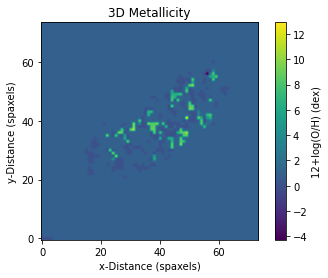

In [10]:
# with fits.open('MetallicityFITS_Pilyugin/Pilyugin_8935-12701.fits', mode='update') as hdul:
#     plt.imshow(hdul[1].data)#,vmin=8.5,vmax=9.5)
#     plt.gca().invert_yaxis()
#     plt.locator_params(axis='y', nbins=5)
#     plt.title('3D Metallicity')
#     plt.xlabel('x-Distance (spaxels)')
#     plt.ylabel('y-Distance (spaxels)')
#     plt.colorbar(label='12+log(O/H) (dex)')